# Week 2: Probability and the Central Limit Theorem (CLT)

## **Notebook Overview**


This notebook reviews:

- Probability
- The central limit theorem

I am aware the central limit theorem was only briefly covered in class so we will be doing a big recap in the Friday TA session.

### **Additional Resources**


Some of you have been asking for additional resources to help understand the problems so here are a few below. Keep in mind that these are textbooks designed for whole degrees of study so they are in much more detail than you need and cover far more topics. Be selective with your reading and keep in mind that the theory in these books is far deeper than we need.

1. [Wooldridge Econometrics:](https://www.academia.edu/44467534/ECONOMETRICS_A_Modern_Approach) A great textbook for statistical modelling, though goes into far more theoretical details than we need for this course. Maths Refreshers A, B and C would be very useful for people who have been away from maths for a while. Maths Refresher A (page 666) starts with recaps of things like percentages, summation...etc. Maths Refresher B (page 684) is a good section for probability. Maths Refresher C (page 714) is about statistics. All three of these chapters have more topics/theory than needed for this course so be selective with your reading. In general this is a great textbook for anyone wanting to explore the theory of the course in more detail.

2. A-level/high school maths textbooks. The UK A-level maths textbooks explain this content from an introductory level. [Edexcel A-Level Maths Old-spec S1:](https://app.box.com/s/amidflaiy8mt2b19uxre6k59mjdfsuhg) Good for the basics. Probability, discrete random variables, normal distributions. [Edexcel A-Level Maths Old-spec S2:](https://app.box.com/s/nl94ctzktuhqofd0gngh6339oqvu85rk) Great for distributions, continuous random variables. [Edexcel A-Level Maths Old-spec S3 and S4:](https://www.aectutors.co.uk/resources/resources-maths-alevel-old-specs/maths-a-level-text-ebooks) You can download these from here though the online previews don't load for me. S3 is a good introduction to the central limit theorem and confidence intervals. S4 introduces the t-distribution and t-tests.

3. The Fox textbook (available on the Canvas reading list) is also okay but mainly starts at regression (Week 3 onwards). Not fantastic for an introduction to statistical theory.

4. [Ben Lambert's YouTube channel](https://www.youtube.com/@SpartacanUsuals). Has courses in introductory econometrics, advanced econometrics and other statistical content. Really well explained short videos. Awesome videos and I used this a lot during my studies. [Central Limit Theorem Introduction:](https://www.youtube.com/watch?v=RzxYTQKjdTo) --> great explainer for the CLT. For those of you who have done a lot of maths and econometrics at undergrad then check out [Central Limit Theorem Proof (part 1)](https://www.youtube.com/watch?v=0oHjbr2_AhQ). This is NOT beginner friendly at all but interesting for those of you with lots of maths experience.
___

### **Notebook Questions**

In each subsection there is text, some code which is already filled in and then code or questions for you to answer at the end.

Please work through each section. It's not a massively long notebook so worth doing it in detail.

As usual we will start by importing some useful libraries. Recall from the
[previous
notebook](https://github.com/Yushi-Y/AAS-ongoing-tutorials/tree/main/W1-Intro_to_Python)
that it is good practise to import these packages with the standard
abbreviations of their names.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # format images as svgs (higher quality)

## **Probability Review**


This section is a brief review of probability as a way to work towards the central limit theorem.

### Expected Value

For a real-valued random variable, the expected value is the average of the possible outcomes weighted by the respective probabilities of occurring. See the lecture notes for more explanation on this.

### Question 1:

Define a random variable X as follows: you roll a fair six-sided die until a six is rolled, X is the total number of rolls required to get a six (inclusive of the final roll). What is the expected value of X?

We have answered this question mathematically below. Simulate this procedure and show the result with a chart to verify the math is correct.

### Mathematical Answer

The expected value is given by the summation over all possible values of X multiplied by their probabilites:

$\mathbb{E}(X) = \sum_{i=1}^{\infty}i*P(X=i)$

For a fair die, the probability $P(X=i) = \frac{5}{6}^{i-1}*\frac{1}{6}$.

i.e. you have $i-1$ rolls which are not a six and then get a six.

The summation is then:

$\mathbb{E}(X) = \sum_{i=1}^{\infty}i*\frac{5}{6}^{i-1}*\frac{1}{6} $

$= 1*\frac{5}{6}^{0}*\frac{1}{6} + 2*\frac{5}{6}^{1}*\frac{1}{6} + 3*\frac{5}{6}^{2}*\frac{1}{6} ... $

This is an infinite geometric series. Recall that a geometric series is a series such that each term of the summation is equal to the previous term times some ratio $r$,

$a + ar + ar^2 + ar^3...$

and the sum of an infinite geometric series is $\frac{a}{1-r}$.

We can observe that this is a sum of several geometric series with $r=\frac{5}{6}$:

$\frac{5}{6}^{0}*\frac{1}{6} + 2*\frac{5}{6}^{1}*\frac{1}{6} + 3*\frac{5}{6}^{2}*\frac{1}{6}... = $

$\frac{5}{6}^{0}*\frac{1}{6} + \quad  \frac{5}{6}^{1}*\frac{1}{6}  + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

$\qquad \quad + \quad  \frac{5}{6}^{1}*\frac{1}{6} + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

$\qquad \quad + \qquad  \qquad + \quad \frac{5}{6}^{2}*\frac{1}{6}...$

The sum of each series is $\frac{a}{1-r}$ where $a$ is the first term, so this is equivalent to:

$\frac{\frac{1}{6}}{1-\frac{5}{6}} + \frac{\frac{5}{36}}{1-\frac{5}{6}} + \frac{\frac{25}{216}}{1-\frac{5}{6}}...$

$ = 1 + \frac{5}{6} + \frac{25}{36}...$

Which is itself a geometric series:

$\sum_{i=1}^{\infty}\frac{5}{6}^i = \frac{1}{1-\frac{5}{6}} = 6$

Therefore, $\mathbb{E}(X) = 6$


**NOTE:** As a shortcut, you could have noticed that this is one of the definitions of a geometric random variable and looked up the mean to find that it is $\frac{1}{p}$




### Monte Carlo Approach
The Monte Carlo approach is a method of getting to the answer by simulating reality ([Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)). It's generally used in siutations where determining the answer to a problem is mathematically difficult or even impossible. To overcome this, the user simulates the real world enviornment and runs a large number of repeats. The mean result gives an estimation for the answer.

In this example, write a set of code to model the world described. Perhaps you need a function to model rolling a dice. Then, maybe a function to count the number of rolls until a 6...etc. With the real world modelled you should then repeat these functions many times. This can be hundreds, thoudands, tens of thousands... the more the better as it will reduce your sample error (in general Monte Carlo simulations you are limited by the time your code takes to run).

From the repeats then calculate the empirical mean, which, given the set up and large number of repeats, should be close to the true mean.


In [ ]:
# Define the random die function
def random_die():
    """ Simulates a random die being rolled. Returns an integer."""
    return stats.randint(1,7).rvs(1)

# Define the counting function
def random_rolls_until_six():
    """ Operates the random_die() function until a 6 is rolled. Counts rolls inclusive of the final roll. """
    count = 0
    while True:
        count += 1
        if random_die() == 6:
            return count

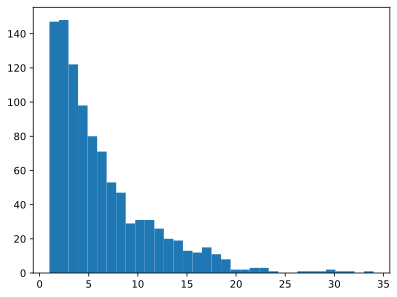

Empirical mean: 5.9980


In [ ]:
# Generate array of the counts for 1000 repeats
counts = np.array([random_rolls_until_six() for _ in range(1000)])

# Plot the counts as a histogram
plt.hist(counts, bins=np.max(counts))
plt.show()

# Print the empirical mean (should be close to 6)
print(f'Empirical mean: {np.mean(counts):0.4f}')

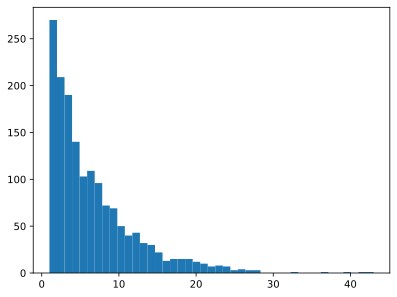

Empirical mean: 6.2639


In [ ]:
# faster code but harder to read

# Generate many rolls
all_rolls = stats.randint(1,7).rvs(10000)

# Count the rolls in between (and including) each 6. Add to list
i = 0
counts = []
for j in all_rolls:
    i += 1
    if j == 6:
        counts.append(i)
        i = 0

# Turn into an array
counts = np.array(counts)

# Histogram
plt.hist(counts, bins=np.max(counts))
plt.show()

# Empirical mean
print(f'Empirical mean: {np.mean(counts):0.4f}')

### Extension Question (Harder)

Only do this if you've completed everything else and want to explore this topic further.

The Monty Hall problem is a famous problem of conditional probability which some of you might have come across before ([Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem)). The original question is as follows:

*Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?*

The answer feels non-intuitive when you first see the problem and confused many mathematicians. Famously, when the answer was printed in a newspaper, thousands of PhD students and academics wrote in to say that the answer was wrong (it was not). [Erdos](https://en.wikipedia.org/wiki/Paul_Erdős), a prominent mathematician remained unconvinced of the answer until he saw a computer simulation.

Create a simulation of this problem in the same way as the last problem then use a Monte Carlo method to show that the probabilities originally printed in the newspaper are correct.


In [ ]:
# Function to set up the game
def game_set_up(switch):
  """Function simulating the Monty Hall problem. Call the doors 0, 1, 2 for simplicity of indexing"""

  # Generate a list for the three doors and intially set all as goats
  door_list = ['goat', 'goat', 'goat']

  # Randomly pick int between 0 and 2 and exchange this for the relevant goat
  door_list[np.random.randint(0,3)] = 'car'

  # Selection of a door by the player
  player_initial_selection = np.random.randint(0,3)

  # Monty opens one of the other doors to reveal a goat
  Monty_potential_doors_to_open = [0, 1, 2]
  Monty_potential_doors_to_open.remove(player_initial_selection) # Remove the door player selected

  # Monty chooses the correct door to reveal
  # Account for the situation where both remaining doors are goats (random choice)
  if door_list[Monty_potential_doors_to_open[0]] == door_list[Monty_potential_doors_to_open[1]]:
    door_to_open = np.random.choice(Monty_potential_doors_to_open)

  # If not, choose the door that has the goat
  else:
    for door_number in Monty_potential_doors_to_open:
      if door_list[door_number] == 'goat':
        door_to_open = door_number

  # Define the door which the player can switch to.
  Monty_potential_doors_to_open.remove(door_to_open)

  # Monty opens `door_to_open'. Input player decision switch or not
  if switch == False:
    final_choice = player_initial_selection
  if switch == True:
    final_choice = Monty_potential_doors_to_open[0]

  # Determine if they are a winner of not. Return 1 if winner, 0 if not
  if door_list[final_choice] == 'car':
    return 1
  else:
    return 0

In [ ]:
# Do 1000 repeats and find the mean (equivalent to the probability)

# Scenario where you don't switch
no_switch = np.array([game_set_up(False) for _ in range(0, 1000)])
p_winning_no_switch = no_switch.mean()

# Scenario where you switch
switch = np.array([game_set_up(True) for _ in range(0, 1000)])
p_winning_switch = switch.mean()

print(f"The probability of winning if you don't switch is {p_winning_no_switch:0.4f}")
print(f"The probability of winning if you switch is {p_winning_switch:0.4f}")

The probability of winning if you don't switch is 0.3410
The probability of winning if you switch is 0.6800


In [ ]:
# Do 100000 to see if the values converge on the true probabilities

# Scenario where you don't switch
no_switch = np.array([game_set_up(False) for _ in range(0, 100000)])
p_winning_no_switch = no_switch.mean()

# Scenario where you switch
switch = np.array([game_set_up(True) for _ in range(0, 100000)])
p_winning_switch = switch.mean()

print(f"The probability of winning if you don't switch is {p_winning_no_switch:0.4f}")
print(f"The probability of winning if you switch is {p_winning_switch:0.4f}")

The probability of winning if you don't switch is 0.3333
The probability of winning if you switch is 0.6671


Got the desired result. Many other ways of doing this, likely with more efficient code.

## **Central Limit Theorem: Motivating Example**


Arguably the most important theorem in statistics. The central limit theorem (CLT) underpins many of the results in the topics we will learn about in future weeks. One of my old statistics tutors described the result as the most beautiful thing humanity had ever discovered. This might be a bit of a stretch but it is certainly a remarkable result. **It is worth investing time to understand this.**

The CLT tells us about the distribution of the sample mean as the number of observations grows. As mentioned, a lot of results in statistics rely on
the CLT, so it is worth getting familiar with the details. There are some
conditions that need to be satisfied for the CLT to hold, for example, we will
usually want to know that the samples are independent and identically
distributed (IID) and that they are drawn from a distribution with a finite
variance.

### CLT: Motivating example

### Question 2 (unanswered questions at the end of the section)

Write the following functions:

1. A function called `rand_exp_mean` which takes a number, `n`, and a rate,
   `lam` and returns the sample average of `n` exponentially distributed (with
   rate `lam`) random variables. Note this should return a different value each
   time you call it since it is a random function. `n` is the number of draws from the distribution in each sample mean.
2. A function called `rand_sample_means` which takes a number, `n` and a rate,
   `lam` and returns an array with 1000 evaluations of the function call
   `rand_exp_mean(n, lam)`. Note that a list comprehension may help here.

### Answer

In [ ]:
# Define a function to generate the sample mean from n observations
def rand_exp_mean(n, lam):
    return stats.expon.rvs(scale = 1/lam, size = n).mean()

# Define a function to generate 1000 sample means using the previous function
def rand_sample_means(n, lam):
    return np.array([rand_exp_mean(n, lam) for _ in range(1000)])

Next, make a histogram of the values from `rand_sample_means` in the question above with `lam=0.2` and `n=5`. On top of this, plot the probability density function of a normal distribution with mean $5$ and standard deviation $5 / \sqrt{5}$. Keep in mind that `5` is a low number number of draws for each sample.

Create a new plot where you repeat this process with `n=100` and with a normal distribution with standard deviation $5 / \sqrt{100}$. `100` is a relatively high number of draws for each sample. What do you notice?

### Answer

First the plot with `n=5`

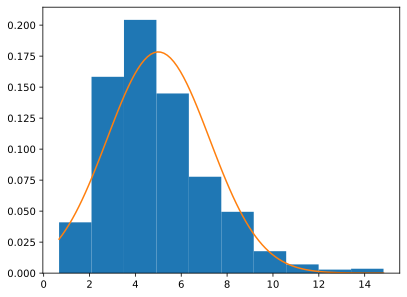

In [ ]:
n = 5

# Generate 1000 values from your random sample means function (each sample mean is the mean of n draws)
rand_sms = rand_sample_means(n, 0.2)

# Use the linspace function from numpy and the stats.norm.pdf function to generate x and y coordinates of a normal distribution
clt_xs = np.linspace(rand_sms.min(), rand_sms.max(), num=100)
clt_ys = stats.norm.pdf(clt_xs, loc=5, scale=5/np.sqrt(n))

# Plot everything up using matplotlib
plt.figure()
plt.hist(rand_sms, density=True)
plt.plot(clt_xs, clt_ys)
plt.show()

Then the plot with `n=100`. Repeat. Your function still generates 1000 sample means but each sample mean is the mean of 100 draws from the distribution.

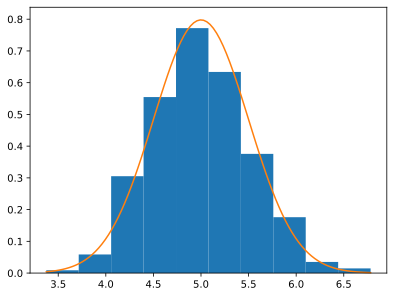

In [ ]:
n = 100
rand_sms = rand_sample_means(n, 0.2)
clt_xs = np.linspace(rand_sms.min(), rand_sms.max(), num=100)
clt_ys = stats.norm.pdf(clt_xs, loc=5, scale=5/np.sqrt(n))

plt.figure()
plt.hist(rand_sms, density=True)
plt.plot(clt_xs, clt_ys)
plt.show()

### Questions

a) What do you notice about the two plots? Describe their differences?


The first plot (small n) is skewed and is not very similar to the theoretical normal distribution. The second plot (large n) appears to be a bell-shaped curve, far more similar to the theoretical normal distribution. Nicely balanced curve.


b) Why is this the case and what role does `n` have in this?

When `n` is small, the distribution of the sample mean poorly approximates the normal distribution. When `n` becomes large (arbitrary but typically over 30-40 observations per sample mean), then the distribution of the sample means closely approximates the normal distribution. The larger `n` becomes, the better the approximation. When `n` is large we can use this approximation for inferences about the sample mean. This is the central limit theorem in action. We will discuss why this is useful later!

## **Central Limit Theorem: Theory**

### Question 3

Write down a statement of the law of large numbers (LLN). See [here](https://en.wikipedia.org/wiki/Law_of_large_numbers) as not covered in the lecture. Also write down a statement of the central limit theorem. Make sure you understand what each of them tells you.

### Answer

-   LLN: $\bar{X}$ converges to $\mu$ as the sample size increases.
-   CLT: $\sqrt{n}(\bar{X} - \mu) / \sigma$ converges in distribution to the
    standard normal distribution as the sample size increases.
-   The LLN tells you what the limiting value is, the CLT tells you
    about the fluctuations in the estimate.

### Question 4

Write down the distribution of the sample mean given an IID sample of
exponential random variables with rate $1/5$.

### Answer

Given we have the rate, we know both the mean and the variance of this distribution.

-   The mean of the exponential distribution is 5.
-   The standard deviation of the exponential distribution is 5

As a result...
-   The CLT therefore tells us the limiting distribution for the sample mean is $N\left(5,\frac{5^2}{n}\right)$

### Question 5 (longer answer required)

Explain the central limit theorem in your own words being as detailed as possible. When might we use it? Why is it important in statistics?


Hint: If completely unsure then check out this [video](https://www.youtube.com/watch?v=RzxYTQKjdTo). Other really good videos on YouTube as well.

### Answer

The central limit theorem states that the distribution of sample means (distribution of $\bar{X}$), made of observation from ANY underlying distribution, will tend to a normal distribution as the number of observations in each sample mean, `n`, increases.

The beauty of this is that we can model the distribution of the sample mean without knowing the details of the underlying distribution of data!! This is massive. The central limit theorem allows us to create structure from data which we might not know anything about. The underlying distribution may be something completely random and really difficult to model BUT given the CLT we know that the distribution of the sample mean will always limit towards a normal distribution as `n` increases.

This allows us to perform hypothesis tests and make inferences about the nature of the underlying distribution - which will be covered properly next lecture. For example, we can do a hypothesis test to assess whether the mean of a distribution differs from the preconceived value.
